In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import re

# Download required NLTK resources
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt_tab')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chintu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chintu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chintu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Load the dataset
file_path = r"C:\Users\chintu\Desktop\Processed_Sentiment_Analysis.csv"
data = pd.read_csv(file_path)

data.head(10)

,date,user,content,id,replyCount,retweetCount,likeCount,quoteCount,hashtags,lang,media,vader_sentiment,sentiment_label
0,2023-05-21 01:14:02+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",'Heart wrenching': #AI #expert details #danger...,1.660000e+18,0,0,0,0,"['AI', 'expert', 'dangers', 'deepfakes', 'dete...",en,"[{'_type': 'snscrape.modules.twitter.Photo', '...",-0.3818,Negative
1,2023-05-21 01:02:38+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",When the Default happens #DebtCeilingCrisis YE...,1.660000e+18,0,0,0,0,"['DebtCeilingCrisis', 'ArtificialIntelligence']",en,NaN,0.8513,Positive
2,2023-05-21 01:01:27+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",Checkout the latest updates from David Estrada...,1.660000e+18,0,0,0,0,"['EZEEBUY', 'SEE_OPEN_BUY', 'AIaaS', 'Innovati...",en,NaN,0.0000,Neutral
3,2023-05-21 00:59:01+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",Opinion: #CambridgeAnalytica on steroids: \n\n...,1.660000e+18,0,0,0,0,"['CambridgeAnalytica', 'ArtificialIntelligence...",en,"[{'_type': 'snscrape.modules.twitter.Photo', '...",0.0000,Neutral
4,2023-05-21 00:58:14+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",This nimble quadruped is designed to be a pet ...,1.660000e+18,0,1,4,1,"['Robot', 'AI', 'ArtificialIntelligence', 'MI'...",en,"[{'_type': 'snscrape.modules.twitter.Video', '...",0.0000,Neutral
5,2023-05-21 00:57:50+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",Checkout the latest updates from David Estrada...,1.660000e+18,0,0,0,0,"['EZEEBUY', 'SEE_OPEN_BUY', 'AIaaS', 'Innovati...",en,NaN,0.0000,Neutral
6,2023-05-21 00:53:03+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",Another nail in the coffin for Adobe (Photosho...,1.660000e+18,0,0,1,0,"['AI', 'aigenerated', 'ArtificialIntelligence'...",en,"[{'_type': 'snscrape.modules.twitter.Video', '...",0.0000,Neutral
7,2023-05-21 00:47:01+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",✨UK schools have been left confused by the fas...,1.660000e+18,0,0,1,0,"['AI', 'ArtificialIntelligence']",en,"[{'_type': 'snscrape.modules.twitter.Photo', '...",-0.1531,Negative
8,2023-05-21 00:47:01+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",How #OpenAI's #CEO Balances AI Development and...,1.660000e+18,0,0,0,0,"['OpenAI', 'CEO', 'Tech', 'TechJunkieInvest', ...",en,"[{'_type': 'snscrape.modules.twitter.Photo', '...",-0.2732,Negative
9,2023-05-21 00:45:59+00:00,"{'_type': 'snscrape.modules.twitter.User', 'us...",Visit our website https://t.co/tsEMeBn1ay or w...,1.660000e+18,1,1,1,0,"['FinancialInclusion', 'OpenBanking', 'DataAna...",en,NaN,0.0000,Neutral


In [4]:
data.describe()

,id,replyCount,retweetCount,likeCount,quoteCount,vader_sentiment
count,5.536000e+03,5536.000000,5536.000000,5536.000000,5536.000000,5536.000000
mean,1.660000e+18,0.236633,0.774025,2.325867,0.052384,0.209985
std,0.000000e+00,0.853920,3.760113,7.832461,0.428608,0.389418
min,1.660000e+18,0.000000,0.000000,0.000000,0.000000,-0.906000
25%,1.660000e+18,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.660000e+18,0.000000,0.000000,1.000000,0.000000,0.038700
75%,1.660000e+18,0.000000,0.000000,2.000000,0.000000,0.509500
max,1.660000e+18,11.000000,68.000000,132.000000,8.000000,0.967800


In [7]:
# Ensure the date column is in datetime format
data['date'] = pd.to_datetime(data['date'])


In [8]:
data.info

<bound method DataFrame.info of                           date  \
0    2023-05-21 01:14:02+00:00   
1    2023-05-21 01:02:38+00:00   
2    2023-05-21 01:01:27+00:00   
3    2023-05-21 00:59:01+00:00   
4    2023-05-21 00:58:14+00:00   
...                        ...   
5531 2023-05-20 23:10:34+00:00   
5532 2023-05-20 23:09:42+00:00   
5533 2023-05-20 23:09:31+00:00   
5534 2023-05-20 23:09:02+00:00   
5535 2023-05-20 23:07:00+00:00   

                                                   user  \
0     {'_type': 'snscrape.modules.twitter.User', 'us...   
1     {'_type': 'snscrape.modules.twitter.User', 'us...   
2     {'_type': 'snscrape.modules.twitter.User', 'us...   
3     {'_type': 'snscrape.modules.twitter.User', 'us...   
4     {'_type': 'snscrape.modules.twitter.User', 'us...   
...                                                 ...   
5531  {'_type': 'snscrape.modules.twitter.User', 'us...   
5532  {'_type': 'snscrape.modules.twitter.User', 'us...   
5533  {'_type': 'snscrape.mo

In [10]:
duplicates = data.duplicated()
duplicates


0       False
1       False
2       False
3       False
4       False
        ...  
5531     True
5532     True
5533     True
5534     True
5535    False
Length: 5536, dtype: bool

In [11]:
data = data.drop_duplicates()

In [12]:
nulls = data.isnull().sum()
nulls

date                 0
user                 0
content              0
id                   0
replyCount           0
retweetCount         0
likeCount            0
quoteCount           0
hashtags             0
lang                 0
media              473
vader_sentiment      0
sentiment_label      0
dtype: int64

In [15]:
#dropping column "media" because it is not useful for sentimental analysis
data = data.drop(columns=['media'])
nulls = data.isnull().sum()
nulls

date               0
user               0
content            0
id                 0
replyCount         0
retweetCount       0
likeCount          0
quoteCount         0
hashtags           0
lang               0
vader_sentiment    0
sentiment_label    0
dtype: int64

In [18]:
data.dtypes

date               datetime64[ns, UTC]
user                            object
content                         object
id                             float64
replyCount                       int64
retweetCount                     int64
likeCount                        int64
quoteCount                       int64
hashtags                        object
lang                            object
vader_sentiment                float64
sentiment_label                 object
dtype: object

In [19]:
# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
# Function for VADER Sentiment Analysis
def vader_sentiment(text):
    scores = sia.polarity_scores(text)
    return scores['compound'], 'Positive' if scores['compound'] >= 0.05 else 'Negative' if scores['compound'] <= -0.05 else 'Neutral'
#checking vader_sentiment
vader_sentiment("bad")

(-0.5423, 'Negative')

In [21]:
# Apply VADER Sentiment Analysis
data[['vader_compound', 'vader_label']] = data['content'].apply(lambda x: pd.Series(vader_sentiment(x)))


In [30]:
# Function for TextBlob Sentiment Analysis
def textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity
#checking TextBlob
textblob_sentiment("she was gorgeous")


(0.7, 0.9)

In [31]:
# Apply TextBlob Sentiment Analysis
data[['textblob_polarity', 'textblob_subjectivity']] = data['content'].apply(lambda x: pd.Series(textblob_sentiment(x)))


In [32]:
# Tokenization, Stopword Removal, and URL Removal
def tokenize_and_remove_stopwords(text):
    # Remove URLs (http:// or https://)
    text = re.sub(r'http\S+|www\S+', '', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.isalnum() and word.lower() not in stop_words]

data['tokens'] = data['content'].apply(tokenize_and_remove_stopwords)

Data vizualization

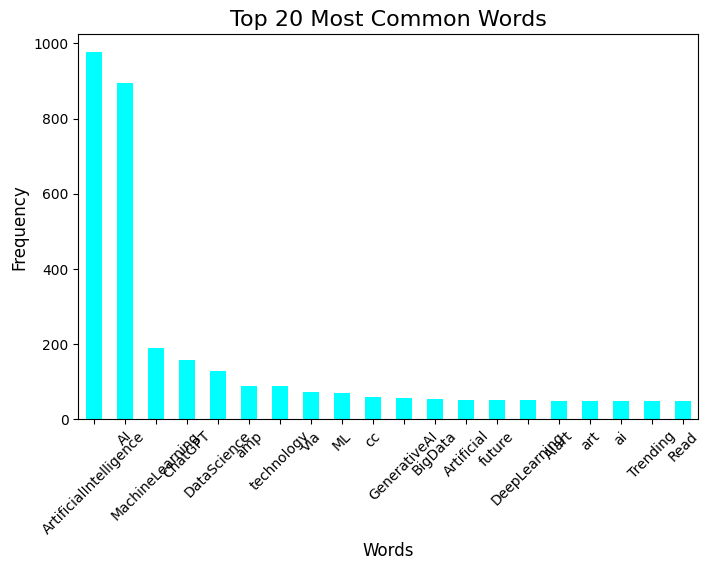

In [35]:
# Create a word frequency chart for most common words
all_words = data['tokens'].explode()
word_freq = all_words.value_counts().head(20)

plt.figure(figsize=(8, 5))
word_freq.plot(kind='bar', color='cyan')
plt.title('Top 20 Most Common Words', fontsize=16)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()


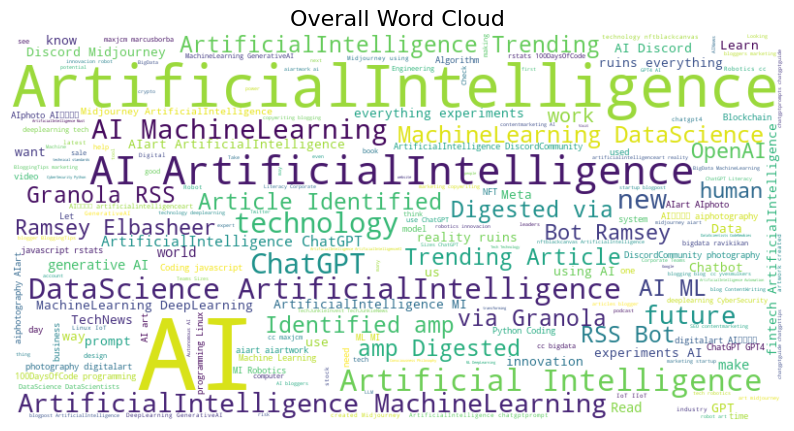

In [36]:
# Generate a Word Cloud for all text
wordcloud_text = " ".join(data['tokens'].explode())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Overall Word Cloud', fontsize=16)
plt.show()

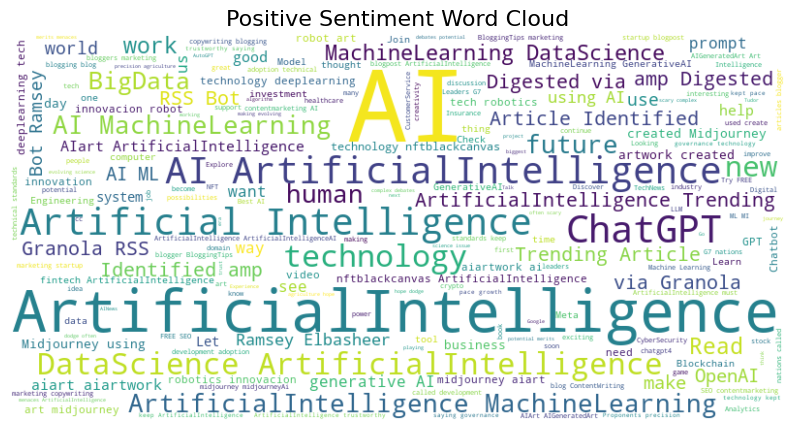

In [37]:
# Generate Word Cloud for Positive Sentiment
positive_text = " ".join(data[data['vader_label'] == 'Positive']['tokens'].explode())
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud', fontsize=16)
plt.show()

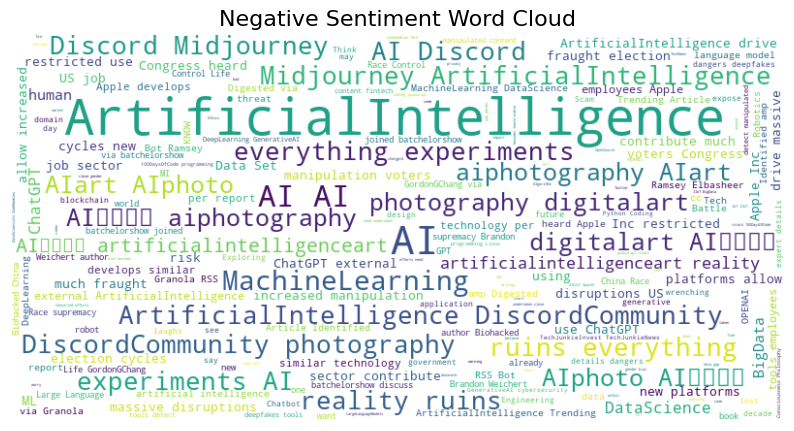

In [38]:
# Generate Word Cloud for Negative Sentiment
negative_text = " ".join(data[data['vader_label'] == 'Negative']['tokens'].explode())
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud', fontsize=16)
plt.show()

C:\Users\chintu\AppData\Local\Temp\ipykernel_16216\2562208087.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vader_label', data=sentiment_comparison, palette='viridis', alpha=0.6, label='VADER')
C:\Users\chintu\AppData\Local\Temp\ipykernel_16216\2562208087.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='textblob_label', data=sentiment_comparison, palette='coolwarm', alpha=0.6, label='TextBlob')


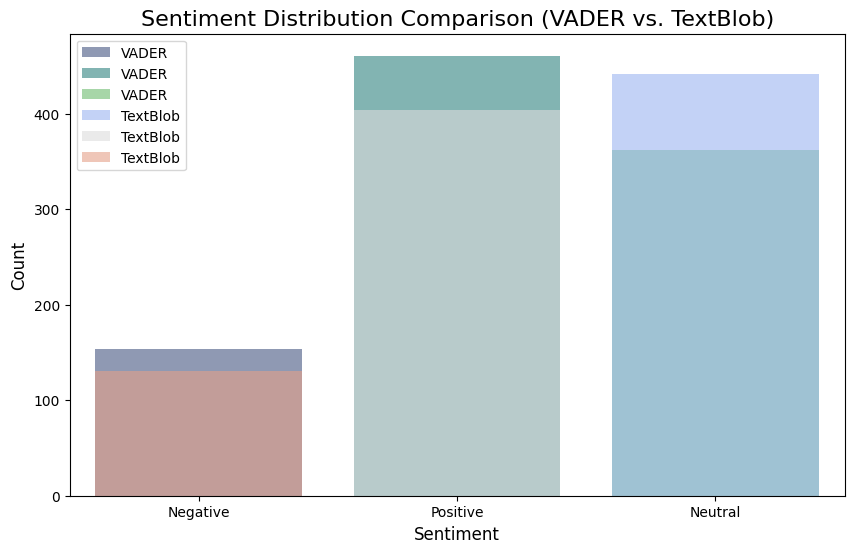

In [39]:
# Sentiment Distribution Comparison (VADER vs. TextBlob)
sentiment_comparison = data.copy()
sentiment_comparison['textblob_label'] = sentiment_comparison['textblob_polarity'].apply(
    lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral')

plt.figure(figsize=(10, 6))
sns.countplot(x='vader_label', data=sentiment_comparison, palette='viridis', alpha=0.6, label='VADER')
sns.countplot(x='textblob_label', data=sentiment_comparison, palette='coolwarm', alpha=0.6, label='TextBlob')
plt.title('Sentiment Distribution Comparison (VADER vs. TextBlob)', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.show()


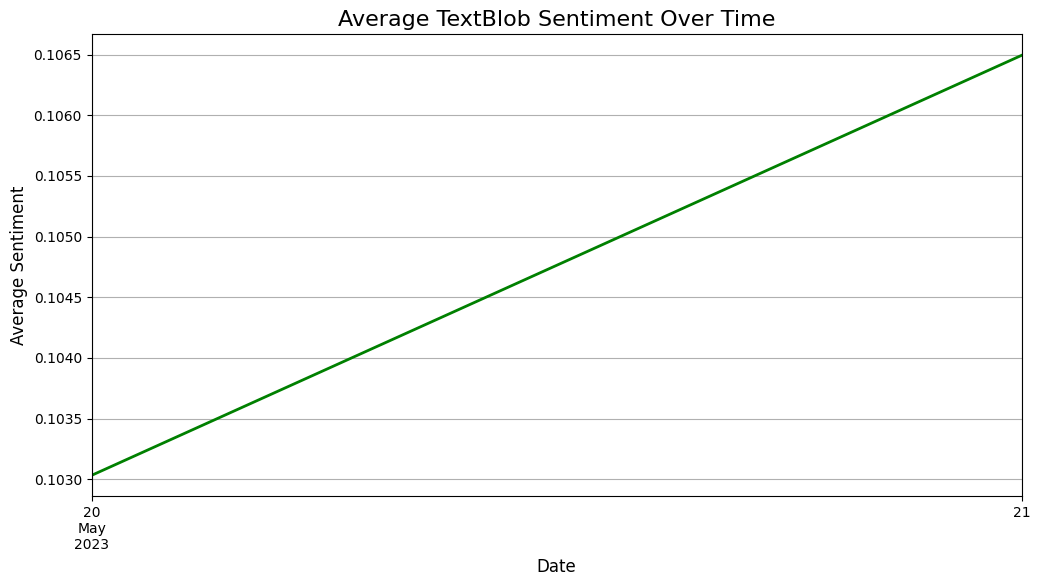

In [40]:
# Sentiment Over Time for TextBlob
plt.figure(figsize=(12, 6))
data.set_index('date').resample('D')['textblob_polarity'].mean().plot(color='green', linewidth=2)
plt.title('Average TextBlob Sentiment Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.grid(True)
plt.show()

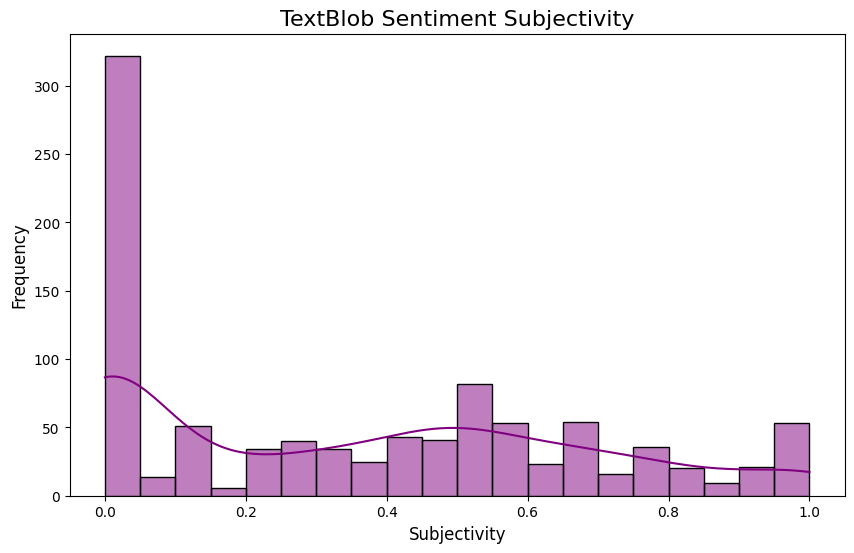

In [41]:
# Bar Plot of TextBlob Subjectivity
plt.figure(figsize=(10, 6))
sns.histplot(data['textblob_subjectivity'], bins=20, kde=True, color='purple')
plt.title('TextBlob Sentiment Subjectivity', fontsize=16)
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

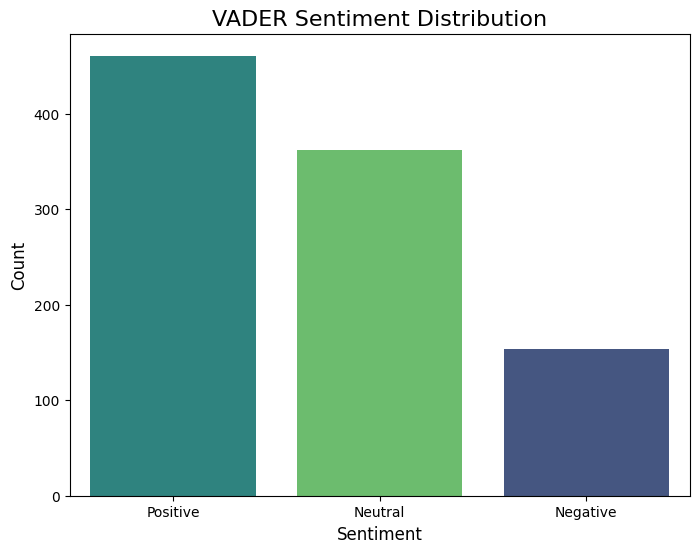

In [60]:
# Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='vader_label', data=data, hue='vader_label', palette='viridis', order=data['vader_label'].value_counts().index, legend=False)
plt.title('VADER Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


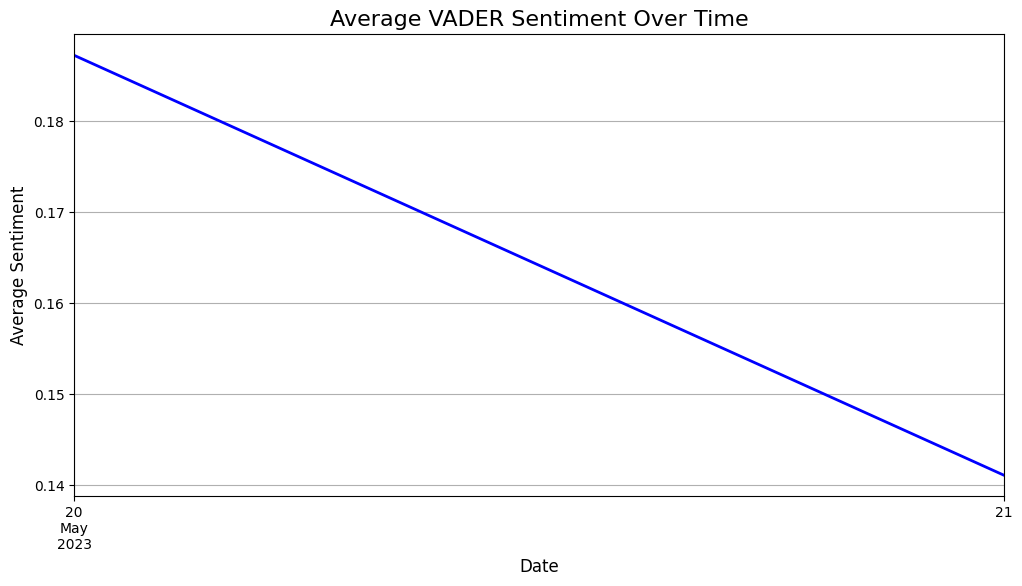

In [45]:
# Sentiment Over Time for VADER
plt.figure(figsize=(12, 6))
data.set_index('date').resample('D')['vader_compound'].mean().plot(color='blue', linewidth=2)
plt.title('Average VADER Sentiment Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.grid(True)
plt.show()

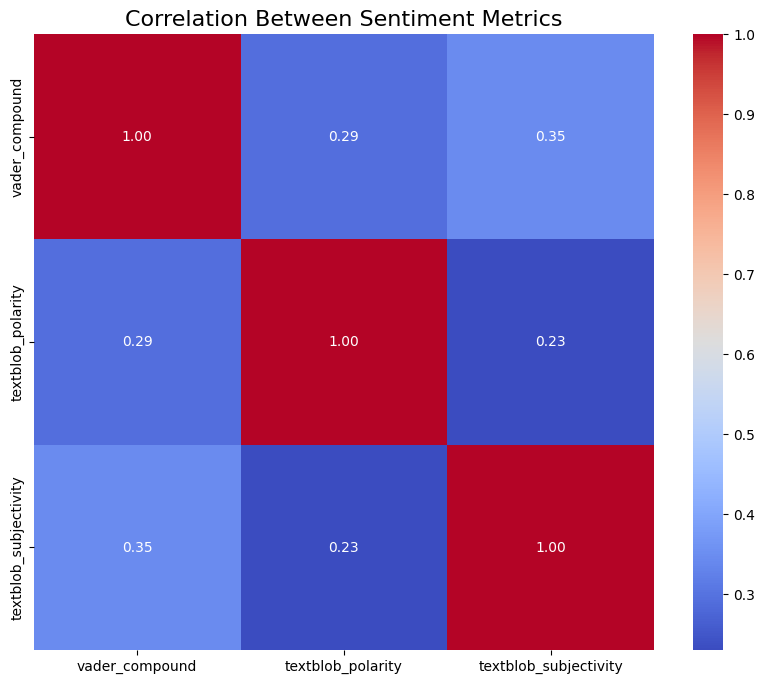

In [46]:
# Correlation Matrix for Sentiments
sentiment_metrics = ['vader_compound', 'textblob_polarity', 'textblob_subjectivity']
correlation = data[sentiment_metrics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Sentiment Metrics', fontsize=16)
plt.show()

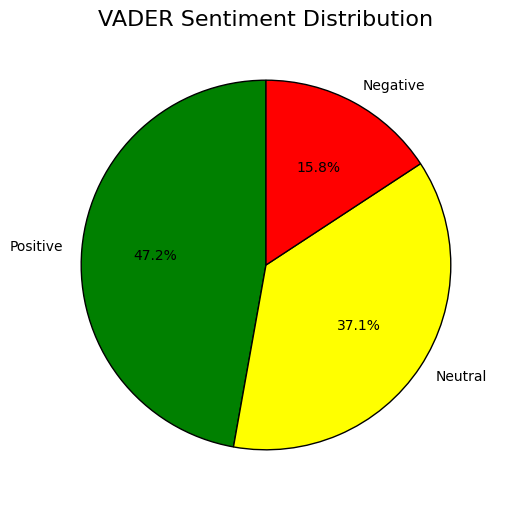

In [47]:
#Pie chart for overall sentiment distribution (VADER)
vader_sentiment_counts = data['vader_label'].value_counts()
plt.figure(figsize=(8, 6))
vader_sentiment_counts.plot.pie(autopct='%1.1f%%', colors=['green', 'yellow', 'red'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('VADER Sentiment Distribution', fontsize=16)
plt.ylabel('')
plt.show()

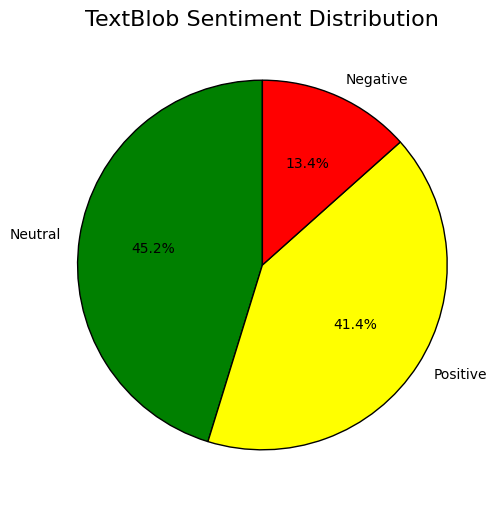

In [52]:
# Make sure the sentiment_label column is created based on TextBlob polarity
data['textblob_label'] = data['textblob_polarity'].apply(
    lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral')

# Pie chart for overall sentiment distribution (TextBlob)
textblob_sentiment_counts = data['textblob_label'].value_counts()
plt.figure(figsize=(8, 6))
textblob_sentiment_counts.plot.pie(autopct='%1.1f%%', colors=['green', 'yellow', 'red'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('TextBlob Sentiment Distribution', fontsize=16)
plt.ylabel('')  # Leave empty, as pie charts don't need a y-axis label
plt.show()


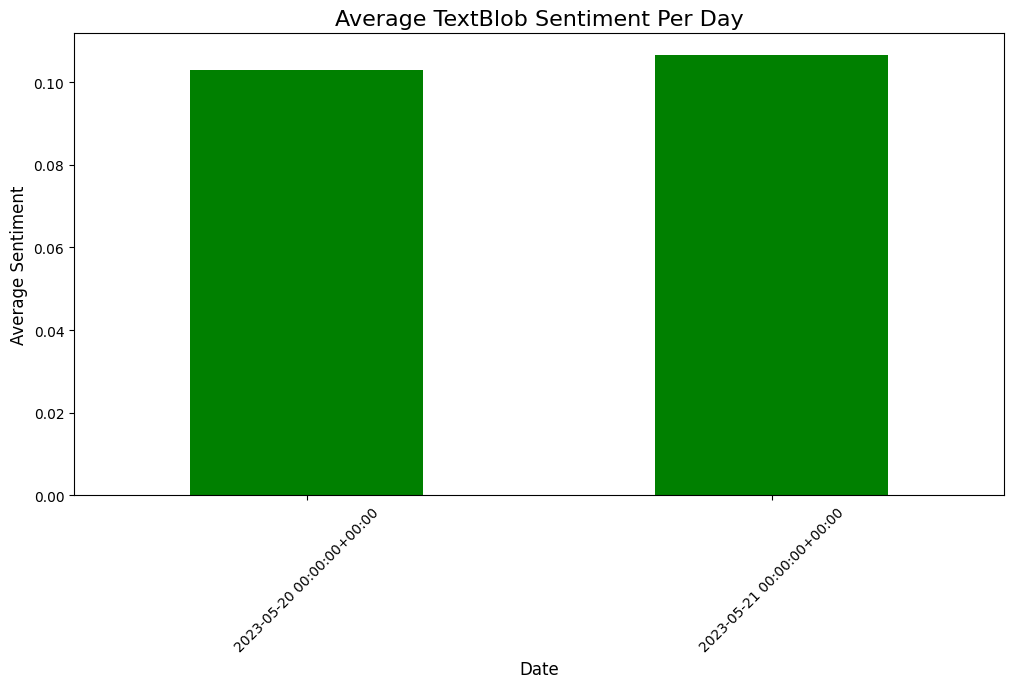

In [53]:
# Bar Chart of average TextBlob sentiment per day over time
plt.figure(figsize=(12, 6))
data.set_index('date').resample('D')['textblob_polarity'].mean().plot(kind='bar', color='green')
plt.title('Average TextBlob Sentiment Per Day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.xticks(rotation=45)
plt.show()

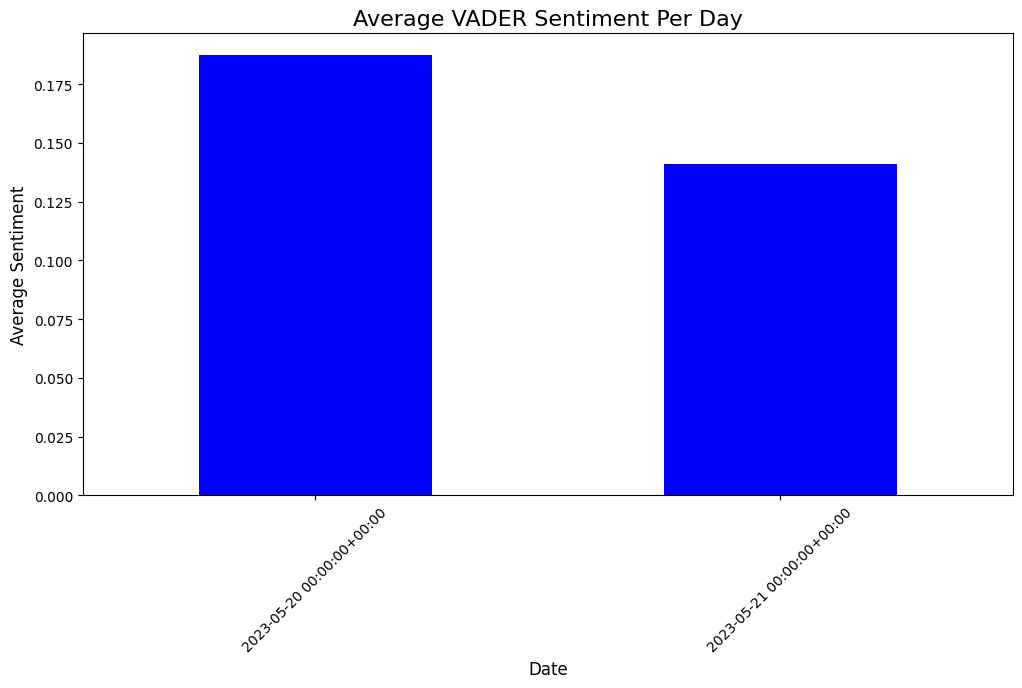

In [54]:
# Bar Chart of average VADER sentiment per day over time
plt.figure(figsize=(12, 6))
data.set_index('date').resample('D')['vader_compound'].mean().plot(kind='bar', color='blue')
plt.title('Average VADER Sentiment Per Day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.xticks(rotation=45)
plt.show()

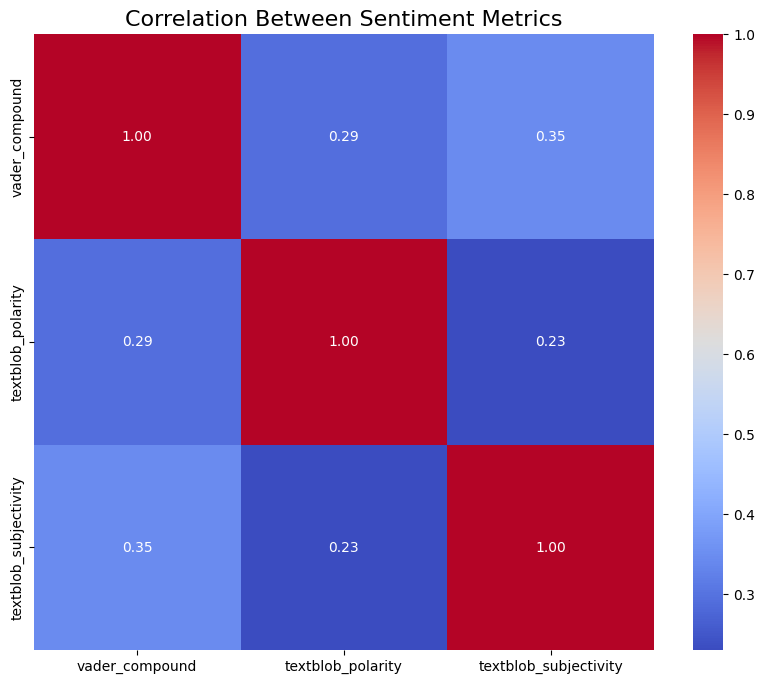

In [55]:
# Heatmap of sentiment correlations
sentiment_metrics = ['vader_compound', 'textblob_polarity', 'textblob_subjectivity']
correlation = data[sentiment_metrics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Sentiment Metrics', fontsize=16)
plt.show()

C:\Users\chintu\AppData\Local\Temp\ipykernel_16216\321540520.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='textblob_label', data=data, palette='coolwarm')


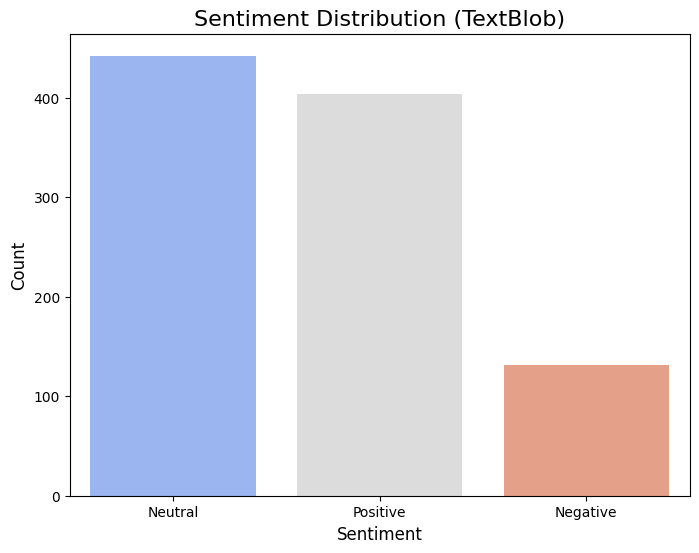

In [58]:
#Count Plot for TextBlob Sentiment labels (with color differentiation)
plt.figure(figsize=(8, 6))
sns.countplot(x='textblob_label', data=data, palette='coolwarm')
plt.title('Sentiment Distribution (TextBlob)', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

C:\Users\chintu\AppData\Local\Temp\ipykernel_16216\321540520.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='textblob_label', data=data, palette='coolwarm')


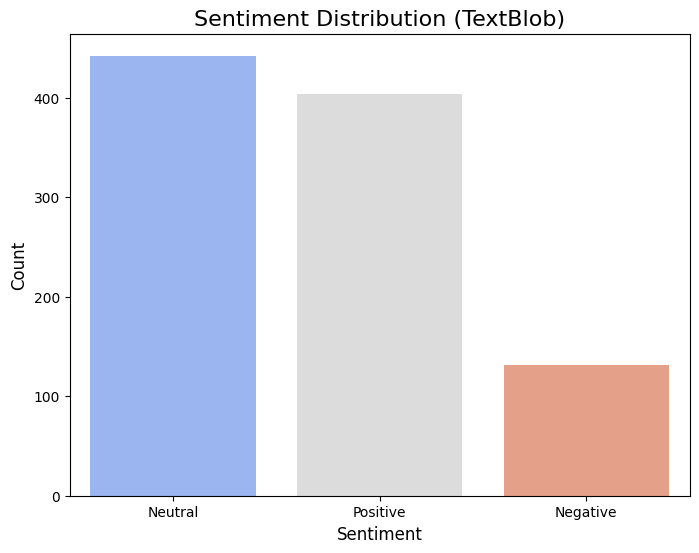

In [61]:
#Count Plot for TextBlob Sentiment labels (with color differentiation)
plt.figure(figsize=(8, 6))
sns.countplot(x='textblob_label', data=data, palette='coolwarm')
plt.title('Sentiment Distribution (TextBlob)', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

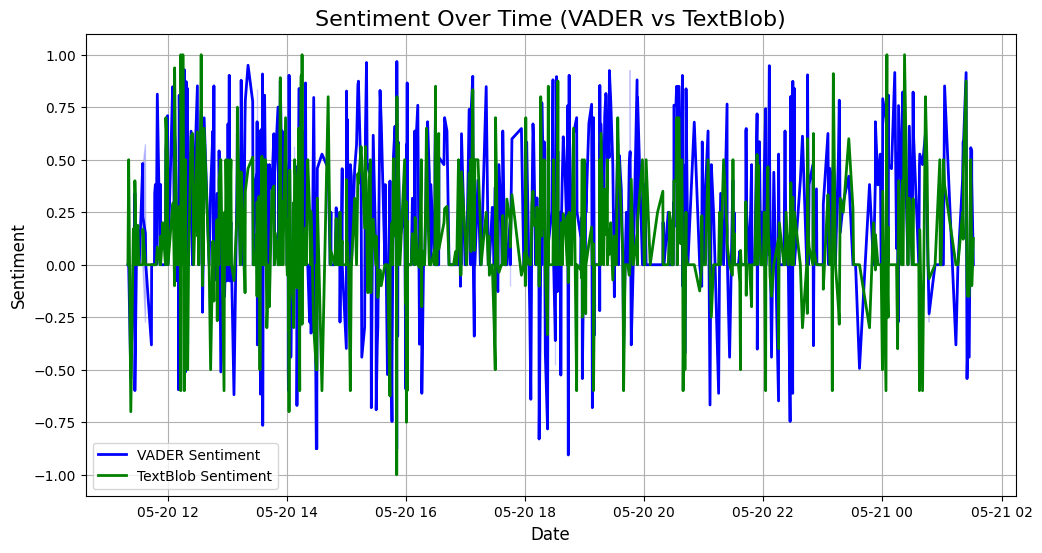

In [62]:
# Sentiment Over Time Comparison: VADER vs TextBlob
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['date'], y=data['vader_compound'], label='VADER Sentiment', color='blue', linewidth=2)
sns.lineplot(x=data['date'], y=data['textblob_polarity'], label='TextBlob Sentiment', color='green', linewidth=2)
plt.title('Sentiment Over Time (VADER vs TextBlob)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sentiment', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()